In [1]:
%matplotlib inline
import pandas as pd
from tqdm import tqdm
import spacy
from spacy.matcher import Matcher
import numpy as np
#nlp = spacy.load('en_core_web_sm')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [2]:
#!pip install seaborn

### load in SRA data

In [3]:
inS_dir='/cellar/users/btsui/Data/nrnb01_nobackup/METAMAP/allSRS.pickle'

sra_dump_pickle_dir='/cellar/users/btsui/Data/SRA/DUMP/sra_dump.pickle'

srsS=pd.read_pickle(inS_dir)

technical_meta_data_df=pd.read_pickle(sra_dump_pickle_dir)

tmpDf=technical_meta_data_df.drop_duplicates('Sample')

technical_meta_data_df=tmpDf.sample(n=tmpDf.shape[0],random_state=0)

#technical_meta_data_df.head()
##take only the top ten per study to avoid study bias
n=100
subsampledSrs=technical_meta_data_df.groupby('Study').head(n=n)['Sample']

#subsampledSrs.head()

m=srsS.index.get_level_values(0).isin(subsampledSrs.values)

srsS_subS=srsS[m]

In [21]:
#attribVC=srsS_subS.index.get_level_values(1).value_counts()

In [176]:
harmonizedDf=pd.read_csv('./Results/harmonizedDf_with_count.tsv',sep='\t')

In [177]:
harmonizedDf[harmonizedDf['Harmonized name']=='analyte_type']

,Unnamed: 0,Name,Harmonized name,Synonyms,Description,Format,n_srs,n_unique,word_count_median
190,21,analyte type,analyte_type,NaN,dbgap_public dictionary,NaN,345193.0,94.0,NaN


In [66]:
attribVC=harmonizedDf.set_index('Harmonized name')['n_unique']

#attribVC

attribVC=attribVC[~attribVC.index.str.contains('_id$')]

In [37]:
#sns.set_style('white')
"""
ax=np.log10(attribVC).hist()
ax.grid(False)
ax.set_ylabel('# of entities')
ax.set_xlabel('# of samples in log10')
"""

"\nax=np.log10(attribVC).hist()\nax.grid(False)\nax.set_ylabel('# of entities')\nax.set_xlabel('# of samples in log10')\n"

In [38]:
#!mkdir ./Results/Figures/

In [39]:
#Idk I think I use 8 or 10 on the legends at 6-8 on the ticks

In [40]:
(attribVC>10000).sum()

4

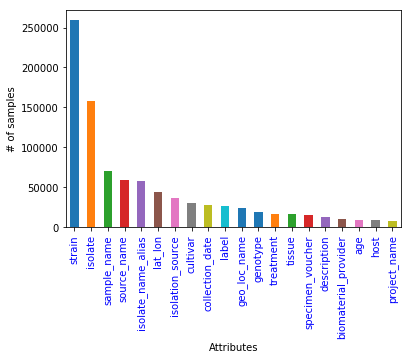

In [192]:
ax=attribVC.iloc[:20].plot.bar()
ax.set_ylabel('# of samples')
ax.set_xlabel('Attributes')
ambigous_attrib=['TITLE','DESCRIPTION']
for xtick_label in ax.get_xticklabels():
    if xtick_label.get_text() in ambigous_attrib:
        xtick_label.set_color('red')
    else:
        xtick_label.set_color('blue')
#ax.figure.savefig('./Results/Figures/sra_landscape.pdf',bbox_inches='tight')

In [42]:
len(srsS_subS),len(srsS)

(12650106, 43907007)

In [43]:
#subRecurDf

In [44]:
srs_resetDf=srsS_subS.reset_index()

srs_resetDf.columns=['srs','attrib','word']

In [45]:
srs_resetDf['word_len']=np.log2(srs_resetDf['word'].str.len())

/cellar/users/btsui/anaconda3/envs/deep_nlp_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log2
  """Entry point for launching an IPython kernel.


In [46]:
attrib_VC=srs_resetDf.attrib.value_counts()

In [47]:
recurr_attrib=attrib_VC.index[:20]#attrib_VC.index[:50]
print ('n recurr attrib',recurr_attrib)

n recurr attrib Index(['SCIENTIFIC_NAME', 'TITLE', 'SUBMITTER_ID', 'BioSampleModel',
       'geo_loc_name', 'collection_date', 'DESCRIPTION', 'source_name',
       'lat_lon', 'strain', 'tissue', 'host', 'isolation_source', 'age',
       'isolate', 'sex', 'env_biome', 'env_feature', 'env_material',
       'cell type'],
      dtype='object')


Text(0.5,0,'attributes (ranked by occurence freqeuncy)')

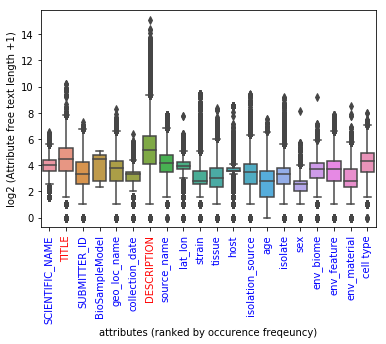

In [48]:
srs_subDf=srs_resetDf[srs_resetDf.attrib.isin(recurr_attrib)]
ax=sns.boxplot(data=srs_subDf,x='attrib',y='word_len',order=recurr_attrib)
plt.xticks(rotation=90)

for xtick_label in ax.get_xticklabels():
    if xtick_label.get_text() in ambigous_attrib:
        xtick_label.set_color('red')
    else:
        xtick_label.set_color('blue')
        
ax.set_ylabel('log2 (Attribute free text length +1)')
ax.set_xlabel('attributes (ranked by occurence freqeuncy)')

In [49]:
import spacy 
from tqdm import tqdm
nlp = spacy.load('./wikipedia-pubmed-and-PMC-w2v')

In [180]:
attribVC

Harmonized name
strain                          259300.0
isolate                         158294.0
sample_name                      70908.0
source_name                      59323.0
isolate_name_alias               58366.0
lat_lon                          44538.0
isolation_source                 36989.0
cultivar                         30822.0
collection_date                  27313.0
label                            26253.0
geo_loc_name                     23392.0
genotype                         18421.0
treatment                        16406.0
tissue                           16364.0
specimen_voucher                 15429.0
description                      12583.0
biomaterial_provider             10085.0
age                               9386.0
host                              8648.0
project_name                      8095.0
ecotype                           6929.0
collected_by                      5951.0
sample_type                       5430.0
env_material                      5087.0


In [194]:
recurr_attrib=list(attribVC.index[attribVC>5000])+['cell type','source name','tissue','cell line']

In [195]:
recurr_attrib

['strain',
 'isolate',
 'sample_name',
 'source_name',
 'isolate_name_alias',
 'lat_lon',
 'isolation_source',
 'cultivar',
 'collection_date',
 'label',
 'geo_loc_name',
 'genotype',
 'treatment',
 'tissue',
 'specimen_voucher',
 'description',
 'biomaterial_provider',
 'age',
 'host',
 'project_name',
 'ecotype',
 'collected_by',
 'sample_type',
 'env_material',
 'dev_stage',
 'cell type',
 'source name',
 'tissue',
 'cell line']

In [196]:
len(recurr_attrib)

29

In [197]:
subRecurDf=srs_resetDf[srs_resetDf.attrib.isin(recurr_attrib)]


In [198]:
#subRecurDf

In [199]:
### randomize and take the first 100 
srs_subDf1=subRecurDf.sample(n=subRecurDf.shape[0]).groupby('attrib').head(n=1000)

In [200]:
docs=nlp.pipe(srs_subDf1['word'].tolist())

In [201]:
vectors=[doc.vector for doc in  tqdm(docs)]

tmpDf=pd.DataFrame(vectors,index=srs_subDf1.set_index(['srs','attrib','word']).index).astype(float)
tmpDf.shape

27029it [00:02, 10956.88it/s]


(27029, 200)

In [202]:
from sklearn import manifold
from sklearn import decomposition
import numpy as np


In [203]:
#tsne=manifold.TSNE()
#pca=decomposition.PCA(n_components=2)

In [204]:
#tmpDf.stack().max()

In [209]:
#corrDf

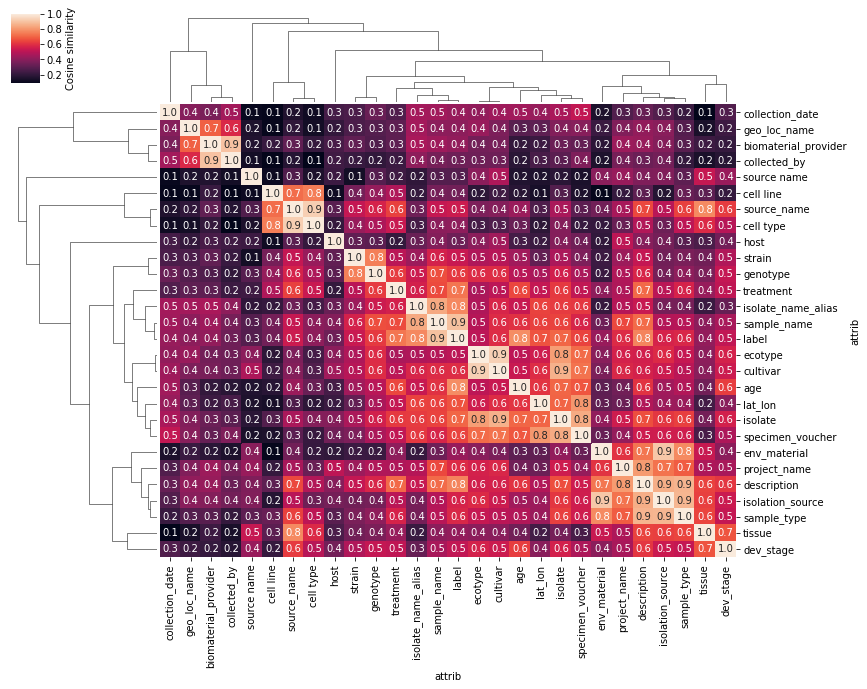

In [206]:
corrDf=tmpDf.dropna().mean(level='attrib').T.corr()
g=sns.clustermap(corrDf,metric='cosine',cbar_kws={'label':'Cosine similarity'},annot=True,figsize=(13,10),fmt=".1f")
g.fig.savefig('./Results/Figures/entity_cluster.pdf',bbox_inches='tight')

In [207]:
#srs_subDf1[srs_subDf1.attrib.str.contains('^isolate')]

In [134]:
!echo $PWD/./Results/Figures/entity_cluster.pdf

/data/cellardata/users/btsui/DEEP_NLP/NLP_spacy/./Results/Figures/entity_cluster.pdf


In [111]:
"""
m=corrDf.mad(axis=1)>0.15
g=sns.clustermap(data=corrDf.loc[m,m],cbar_kws={'label':'Pearson correlation'})
"""

"\nm=corrDf.mad(axis=1)>0.15\ng=sns.clustermap(data=corrDf.loc[m,m],cbar_kws={'label':'Pearson correlation'})\n"

In [131]:
tsneInDf=tmpDf.dropna()


In [132]:
inPlot=['sex','gender','tissue','cell type']
m1=tsneInDf.index.get_level_values('attrib').isin(inPlot)

In [133]:
subTsneInDf=tsneInDf[m1]

In [134]:
%%time
#tsne=manifold.TSNE()
tsneM=pca.fit_transform(subTsneInDf)

CPU times: user 228 ms, sys: 8 ms, total: 236 ms
Wall time: 17.1 ms


In [141]:
pca.explained_variance_ratio_

array([0.32561108, 0.06598548])

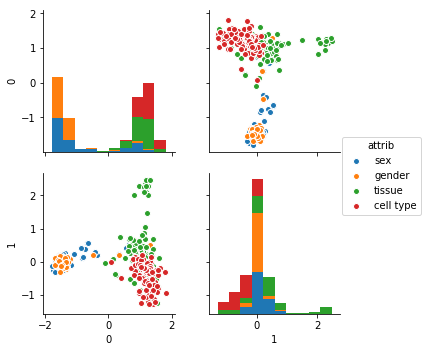

In [139]:
tsneDf=pd.DataFrame(tsneM.copy(),index=subTsneInDf.index)

tsneDf.head()

tsneDf.groupby('attrib').size()

import numpy as np

tsneDf[0]+= np.random.normal(0,0.1,tsneDf.shape[0])
tsneDf[1]+= np.random.normal(0,0.1,tsneDf.shape[0])
g=sns.pairplot(tsneDf.reset_index()[['attrib',0,1]],hue='attrib',hue_order=['sex','gender','tissue','cell type'])
g.savefig('./Results/entity_paired_plots.pdf')

In [140]:
!echo $PWD/./Results/entity_paired_plots.pdf

/data/cellardata/users/btsui/DEEP_NLP/NLP_spacy/./Results/entity_paired_plots.pdf


In [136]:
m1=tsneDf.index.get_level_values('attrib')=='gender'
m2=tsneDf[0]>0
tsneDf[m1&m2]

,,,0,1
srs,attrib,word,,
SRS684337,gender,F,0.676656,-0.216923
SRS688288,gender,NA,1.101318,0.841608
SRS1538770,gender,None,0.667770,0.696278
SRS445178,gender,M,0.084270,0.537532
SRS462064,gender,M,1.390099,0.425717


In [137]:
doc=next(docs)

StopIteration: 

In [ ]:
doc.vector

In [107]:
list(doc.noun_chunks)

[Leaf sample, Camellia oleifera]

In [108]:
for np in doc.noun_chunks:
    span=doc[np.start:np.end]
    span.merge()

In [176]:
#doc.vector

In [92]:
for a in doc:
    print (a)

Leaf sample
from
Camellia oleifera


In [93]:
len(subsampledSrs.values)

1217901

In [94]:
#doc.noun_chunks

In [96]:
#from gensim.models import word2vec
#word2vec.Word2Vec()

In [7]:
#!wget http://evexdb.org/pmresources/vec-space-models/PubMed-and-PMC-w2v.bin

--2018-06-14 14:36:27--  http://evexdb.org/pmresources/vec-space-models/PubMed-and-PMC-w2v.bin
Resolving evexdb.org (evexdb.org)... 130.232.253.44
Connecting to evexdb.org (evexdb.org)|130.232.253.44|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3317501420 (3.1G) [application/octet-stream]
Saving to: 'PubMed-and-PMC-w2v.bin'

PubMed-and-PMC-w2v.   3%[                    ] 120.01M  1.33MB/s    eta 50m 58s^C


In [9]:
#!rm PubMed-and-PMC-w2v.bin

In [26]:
import spacy

nlp = spacy.load('en_core_web_sm')
doc = nlp(u"Streptococcus pneumoniae")
for chunk in doc.noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,
          chunk.root.head.text)

Streptococcus pneumoniae pneumoniae ROOT pneumoniae


In [582]:
!pip install tensorflow

    100% |################################| 49.1MB 217kB/s eta 0:00:01
    100% |################################| 9.0MB 445kB/s eta 0:00:01
    100% |################################| 3.1MB 404kB/s eta 0:00:01
    100% |################################| 7.1MB 492kB/s eta 0:00:01
    100% |################################| 92kB 567kB/s eta 0:00:01
    100% |################################| 81kB 640kB/s eta 0:00:01
    100% |################################| 327kB 647kB/s eta 0:00:01
    100% |################################| 890kB 732kB/s eta 0:00:01
  Running setup.py bdist_wheel for gast ... done
  Stored in directory: /cellar/users/btsui/.cache/pip/wheels/9a/1f/0e/3cde98113222b853e98fc0a8e9924480a3e25f1b4008cedb4f
  Running setup.py bdist_wheel for absl-py ... done
  Stored in directory: /cellar/users/btsui/.cache/pip/wheels/a0/f8/e9/1933dbb3447ea6ef57062fd5461cb118deb8c2ed074e8344bf
  Running setup.py bdist_wheel for html5lib ... done
  Stored in directory: /cellar/users/btsui/.c

In [183]:
srsS=srsS.str.len()

In [188]:
srsS_=srsS[srsS<200]

In [200]:
srsS_.quantile(0.025),srsS_.quantile(1-0.025)

(1.0, 65.0)

Text(0,0.5,'# of entity-freetext pairs')

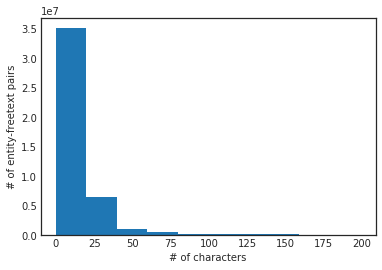

In [196]:
ax=srsS_.hist()
ax.grid(False)
ax.set_xlabel('# of characters')
ax.set_ylabel('# of entity-freetext pairs')

In [192]:
srsS_.mean()

14.464158402039159

In [193]:
srsS_.std()

18.437992075986067

In [208]:
meanLengthS=srsS_.groupby(level=1).mean()

In [211]:
(meanLengthS.loc['DESCRIPTION']+meanLengthS.loc['TITLE'])/2.0

46.10526928040302

In [206]:
150.1916025448552/14.6

10.287096064716108

In [165]:
tmpS=srsS.sample(n=100000)

In [166]:
subSrsS=tmpS.str.contains('DNA|RNA',case=False)

In [167]:
subSrsS.groupby(level=1).sum().sort_values()

                                      0.0
other_neuro_problems                  0.0
other_medications                     0.0
other_infectious_problems_aao         0.0
other_infectious_problems             0.0
other_immune_problems_explain         0.0
other_immune_problems                 0.0
other_neuro_problems_explain          0.0
other_id                              0.0
other_cancer_age                      0.0
other genetic traits                  0.0
other                                 0.0
original_order                        0.0
original_name                         0.0
original genome build                 0.0
other_condtitions_list                0.0
other_ob_history                      0.0
other_supplement_frequency            0.0
otherallergies                        0.0
oxygen_unit                           0.0
oxygen_percent                        0.0
oxygen_mg_per_l                       0.0
oxygen                                0.0
oxy_stat_samp                     

In [ ]:
"""
molecular data type                           17.0
DESCRIPTION                                   28.0
analyte type
"""